# Question 0 Warm
&nbsp;  URLS of 2009 RECS data: 
'https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv'
<br/>
&nbsp;  URLS of 2009 weighted replicate data: 
'https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv'
<br/>
&nbsp;  URLS of 2015 RECS data: 
'https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv'
<br/> 
&nbsp;  After reading codebook, variable 'HDD65' is chosen for heating degree days,'CDD65' for cooling degree days.
'REGIONC' for census region,'DOEID' for id of residents. These 4 variables are both chosen from 2009RECS and 2015RECS data. 
For 2015 RECS data, variable 'BRRWTxx's are chosen for replicated weights and 'NWEIGHT' chosen for final sample weight.
For 2009 weight data, variable 'brr_weight_x+' is chosen for replicated weights,'NWEIGHT' chosen for final sample weight. 

## The method of using replicate weights.
&nbsp; The link explaining how to use the replicate weights is 'https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf'.  Related pdf document is [RECS](https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf). 
<br/>
&nbsp; In RECS, Fay’s method of the balanced repeated replication (BRR) technique is used for estimating standard errors. 
  Replicate weights are used in this method to repeatedly estimate the statistic of interest and calculate the differences between these estimates and the full-sample estimate.
<br/>  
&nbsp; $\theta$ is defined as a population parameter of interest. Define $\hat{\theta}$ as the estimate from the full sample for $\theta$.Define $\hat{\theta_{r}}$ as the estimate from the r-th replicate subsample by using replicate weights. Define R as the total number of replicate subsamples(For 2015 RECS, R = 96 and $\epsilon$ = 0.5). Define $\epsilon$ as the Fay coefficient,$0 \le \epsilon < 1$. Then the variance of $\hat{\theta}$ is estimated by $\hat{V}({\hat{\theta}})$:
<br/>
$$ \hat{V}(\hat{\theta}) = \frac{1}{R(1 - \epsilon^{2})}\sum_{r = 1}^{R}({\hat{\theta_{r}}} - {\hat{\theta}})^2 $$
<br/>
&nbsp; Since the standard error of an estimator is the square root of that estimator’s variance,so standard error $\hat{SE}(\hat{\theta})$ is:
$$ \hat{SE(\hat{\theta)}} = \sqrt[2]{\hat{V}(\hat{\theta})}$$




In [2]:
import pandas as pd
import re # to match replicated weight in 2015 RECS data 
import os 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Question 1

## (a)
# import 2019RECS,weighted data and 2015RECS data
url_2009 = 'https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv'
url_2015 = 'https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv'
url_2009_r_weight = 'https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv'
local_files = ['recs2009_public.csv', 'recs2015_public_v4.csv', 'recs2009_public_repweights.csv']
# 2009 RECS
if os.path.exists('./'+local_files[0]):
    data_2009 = pd.read_csv('./'+local_files[0], low_memory = False)
else:
    data_2009 = pd.read_csv(url_2009, low_memory = False)
    data_2009.to_csv(local_files[0], index = False)
    
#  2015 RECS
if os.path.exists('./'+local_files[1]):
    data_2009 = pd.read_csv('./'+local_files[1], low_memory = False)
else:
    data_2015 = pd.read_csv(url_2015, low_memory = False)
    data_2015.to_csv(local_files[1], index = False)
    
#  2009 weight
if os.path.exists('./'+local_files[2]):
    data_2009_weight = pd.read_csv('./'+local_files[2], low_memory = False)
else:
    data_2009_weight = pd.read_csv(url_2009_r_weight, low_memory = False)
    data_2009_weight.to_csv(local_files[2], index = False)

In [8]:
## necessary columns:
n_cols = ['DOEID', 'CDD65', 'HDD65', 'REGIONC', 'NWEIGHT']

## data_2009_1 is the organized data for year 2009
d_trans = data_2009_weight.loc[:, ['DOEID', 'NWEIGHT']]
data_2009_all = data_2009.merge(d_trans, on = 'DOEID')
# after merging, columns 'NWEIGHT' adds a suffix '_y'
data_2009_all = data_2009_all.rename(columns = {'NWEIGHT_y' : 'NWEIGHT'})
data_2009_1 = data_2009_all[n_cols]
data_2009_1 = data_2009_1.rename(str.lower, axis = 'columns')
## From codebook, variable 'regionc' is categorical, make dtype transformation.
data_2009_1 = data_2009_1.astype({'regionc' : 'category'})

## data_2015_1 is the organized data for year 2015
data_2015_1 = data_2015[n_cols]
data_2015_1 = data_2015_1.rename(str.lower, axis = 'columns')
data_2015_1 = data_2015_1.astype({'regionc' : 'category'})

In [203]:
display(data_2009_1)

,doeid,cdd65,hdd65,regionc,nweight
0,1,1080,4742,2,2471.679705
1,2,199,2662,4,8599.172010
2,3,505,6233,1,8969.915921
3,4,672,6034,2,18003.639600
4,5,702,5388,1,5999.605242
...,...,...,...,...,...
12078,12079,332,7671,2,10219.802880
12079,12080,2844,2085,3,8689.074445
12080,12081,472,7935,2,4697.213624
12081,12082,770,5834,4,13155.678790


In [204]:
display(data_2015_1)

,doeid,cdd65,hdd65,regionc,nweight
0,10001,1768,2031,4,12085.16227
1,10002,2795,1915,3,14410.19627
2,10003,2235,2263,3,23325.95385
3,10004,1374,3754,2,12165.33319
4,10005,993,5401,1,16717.67092
...,...,...,...,...,...
5681,15682,632,6470,2,14190.77054
5682,15683,2055,2512,3,13617.68710
5683,15684,937,5941,2,20365.17745
5684,15685,3464,1438,3,15110.19635


In [15]:
## (b)
## 2009 data replicated weight, l_format_2009 is the organized data
data_2009_2 = data_2009_weight.drop(columns = ['NWEIGHT'])
data_2009_2 = data_2009_2.rename(str.lower, axis = 'columns')
col_09 = [i for i in data_2009_2.columns[1:]]
l_format_2009 = pd.melt(data_2009_2, id_vars = ['doeid'], value_vars = col_09)
l_format_2009 = l_format_2009.rename(columns = {'variable' : 'replicate number'})

##  2015 data replicated weight, l_format_2015 is the organized data
pattern = re.compile(r'BRRWT([\d])+')
match_l = [pattern.match(i) for i in list(data_2015.columns)]
match_list = filter(None, match_l) # delete None value in match result
match_result = [i.group(0) for i in match_list]
col_15 = ['DOEID']
col_15.extend(match_result)
data_2015_2 = data_2015[col_15] 
l_format_2015 = pd.melt(data_2015_2, id_vars = ['DOEID'], value_vars = match_result)
l_format_2015 = l_format_2015.rename(columns = {'DOEID' : 'doeid', 'variable' : 'replicate number'})

   doeid replicate number         value
0      1     brr_weight_1   3628.305158
1      2     brr_weight_1   4408.308000
2      3     brr_weight_1  13664.732100
3      4     brr_weight_1   9456.435434
4      5     brr_weight_1   8659.554041
   doeid replicate number         value
0  10001           BRRWT1  16555.311270
1  10002           BRRWT1  21486.287200
2  10003           BRRWT1  12297.436760
3  10004           BRRWT1  18553.958900
4  10005           BRRWT1   8075.744168


In [34]:
display(l_format_2009)

,doeid,replicate number,value
0,1,brr_weight_1,3628.305158
1,2,brr_weight_1,4408.308000
2,3,brr_weight_1,13664.732100
3,4,brr_weight_1,9456.435434
4,5,brr_weight_1,8659.554041
...,...,...,...
2948247,12079,brr_weight_244,15669.237850
2948248,12080,brr_weight_244,3976.693639
2948249,12081,brr_weight_244,2479.082636
2948250,12082,brr_weight_244,17663.466590


In [35]:
display(l_format_2015)

,doeid,replicate number,value
0,10001,BRRWT1,16555.311270
1,10002,BRRWT1,21486.287200
2,10003,BRRWT1,12297.436760
3,10004,BRRWT1,18553.958900
4,10005,BRRWT1,8075.744168
...,...,...,...
545851,15682,BRRWT96,20183.445250
545852,15683,BRRWT96,19681.916720
545853,15684,BRRWT96,29148.112150
545854,15685,BRRWT96,20695.042680


In [56]:
# Question 2

## (a)
## year 2009 
### heating and cooling average point estimate : theta
region_dict = {'1' : 'Northeast Census Region',
               '2' : 'Midwest Census Region',
               '3' : 'South Census Region',
               '4' : 'West Census Region'}
region_list = data_2009_1['regionc'].unique()
heat_weighted_avr_09 = {}
cool_weighted_avr_09 = {}
heat_weighted_avr_15 = {}
cool_weighted_avr_15 = {}
for i in region_list:
    # 2009
    sub_data_09 = data_2009_1.loc[data_2009_1['regionc'] == i, ]
    heat_09 = pd.Series(sub_data_09['hdd65'])
    cool_09 = pd.Series(sub_data_09['cdd65'])
    weight_09 = pd.Series(sub_data_09['nweight'])
    heat_avr_09 = sum(heat_09 * weight_09) / sum(weight_09)
    cool_avr_09 = sum(cool_09 * weight_09) / sum(weight_09)
    heat_weighted_avr_09.update({region_dict[str(i)]+'09' : heat_avr_09})
    cool_weighted_avr_09.update({region_dict[str(i)]+'09' : cool_avr_09})
    # 2015
    sub_data_15 = data_2015_1.loc[data_2015_1['regionc'] == i, ]
    heat_15 = pd.Series(sub_data_15['hdd65'])
    cool_15 = pd.Series(sub_data_15['cdd65'])
    weight_15 = pd.Series(sub_data_15['nweight'])
    heat_avr_15 = sum(heat_15 * weight_15) / sum(weight_15)
    cool_avr_15 = sum(cool_15 * weight_15) / sum(weight_15)
    heat_weighted_avr_15.update({region_dict[str(i)]+'15' : heat_avr_15})
    cool_weighted_avr_15.update({region_dict[str(i)]+'15' : cool_avr_15})

In [91]:
print('heat_09:', heat_weighted_avr_09, '\n')
print('cool_09:', cool_weighted_avr_09, '\n')
print('heat_15:', heat_weighted_avr_15, '\n')
print('cool_15:', cool_weighted_avr_15)

heat_09: {'Midwest Census Region09': 6325.3370557584785, 'West Census Region09': 3259.641522235592, 'Northeast Census Region09': 5700.988117899617, 'South Census Region09': 2696.6675541636932} 

cool_09: {'Midwest Census Region09': 660.8883799886537, 'West Census Region09': 1328.642133877938, 'Northeast Census Region09': 680.7151284720687, 'South Census Region09': 2207.728366086422} 

heat_15: {'Midwest Census Region15': 5785.490455651489, 'West Census Region15': 2814.83069243554, 'Northeast Census Region15': 5695.6730027173635, 'South Census Region15': 2211.8799008325286} 

cool_15: {'Midwest Census Region15': 956.0743124095824, 'West Census Region15': 1576.7742038635408, 'Northeast Census Region15': 983.9198613817919, 'South Census Region15': 2639.8509877725355}


In [70]:
### heating and cooling variance : var(theta)
data_2009_all = data_2009_1.merge(data_2009_2, on = 'doeid')
heat_09_thetar = {}
heat_15_thetar = {}
cool_09_thetar = {}
cool_15_thetar = {}

# var 2009 
for i in region_list:
    thetar_heat_l = []
    thetar_cool_l = []
    for j in col_09:
        # heat
        subdata_09 = data_2009_all.loc[data_2009_all['regionc'] == i, :]
        heat_r_09 = pd.Series(subdata_09['hdd65'])
        cool_r_09 = pd.Series(subdata_09['cdd65'])
        weight_r_09 = pd.Series(subdata_09[j])
        theta_heat_r = sum(heat_r_09 * weight_r_09) / sum(weight_r_09) 
        theta_cool_r = sum(cool_r_09 * weight_r_09) / sum(weight_r_09) 
        thetar_heat_l.append(theta_heat_r)
        thetar_cool_l.append(theta_cool_r)
    key = region_dict[str(i)] + '09'
    theta_heat = heat_weighted_avr_09[key]
    theta_cool = cool_weighted_avr_09[key]
    R = len(thetar_l)
    epsilon = 0.5
    dev_heat = [pow(k - theta_heat, 2) for k in thetar_heat_l]
    dev_cool = [pow(m - theta_cool, 2) for m in thetar_cool_l]
    var_heat_thetar = 1 / (R * pow(1 - epsilon, 2)) * sum(dev_heat) 
    var_cool_thetar = 1 / (R * pow(1 - epsilon, 2)) * sum(dev_cool) 
    heat_09_thetar.update({key : var_heat_thetar})
    cool_09_thetar.update({key : var_cool_thetar})
    

In [78]:
# var 2015
match_result = [i.lower() for i in match_result]
data_2015_2 = data_2015_2.rename(str.lower, axis = 'columns')
data_2015_all = data_2015_1.merge(data_2015_2, on = 'doeid')
for i in region_list:
    thetar_heat_l = []
    thetar_cool_l = []
    for j in match_result:
        # heat
        subdata_15 = data_2015_all.loc[data_2015_all['regionc'] == i, :]
        heat_r_15 = pd.Series(subdata_15['hdd65'])
        cool_r_15 = pd.Series(subdata_15['cdd65'])
        weight_r_15 = pd.Series(subdata_15[j])
        theta_heat_r = sum(heat_r_15 * weight_r_15) / sum(weight_r_15) 
        theta_cool_r = sum(cool_r_15 * weight_r_15) / sum(weight_r_15) 
        thetar_heat_l.append(theta_heat_r)
        thetar_cool_l.append(theta_cool_r)
    key = region_dict[str(i)] + '15'
    theta_heat = heat_weighted_avr_15[key]
    theta_cool = cool_weighted_avr_15[key]
    R = len(thetar_l)
    epsilon = 0.5
    dev_heat = [pow(k - theta_heat, 2) for k in thetar_heat_l]
    dev_cool = [pow(m - theta_cool, 2) for m in thetar_cool_l]
    var_heat_thetar = 1 / (R * pow(1 - epsilon, 2)) * sum(dev_heat) 
    var_cool_thetar = 1 / (R * pow(1 - epsilon, 2)) * sum(dev_cool) 
    heat_15_thetar.update({key : var_heat_thetar})
    cool_15_thetar.update({key : var_cool_thetar})

In [94]:
# confidence interval for each region: [mean - sd * 1.96, mean + sd * 1.96]
# dict region elements: Midwest Census Region09/15, West Census Region09/15, Northeast Census Region09/15 
# South Census Region09/15 
## heat_09
h_Mid_09_lower = heat_weighted_avr_09['Midwest Census Region09'] - 1.96 * \
                                                         np.sqrt(heat_09_thetar['Midwest Census Region09'])
h_Mid_09_upper = heat_weighted_avr_09['Midwest Census Region09'] + 1.96 * \
                                                         np.sqrt(heat_09_thetar['Midwest Census Region09'])
h_Wes_09_lower = heat_weighted_avr_09['West Census Region09'] - 1.96 * np.sqrt(heat_09_thetar['West Census Region09'])
h_Wes_09_upper = heat_weighted_avr_09['West Census Region09'] + 1.96 * np.sqrt(heat_09_thetar['West Census Region09'])
h_Nor_09_lower = heat_weighted_avr_09['Northeast Census Region09'] - 1.96 * \
                                                         np.sqrt(heat_09_thetar['Northeast Census Region09'])
h_Nor_09_upper = heat_weighted_avr_09['Northeast Census Region09'] + 1.96 * \
                                                         np.sqrt(heat_09_thetar['Northeast Census Region09'])
h_Sou_09_lower = heat_weighted_avr_09['South Census Region09'] - 1.96 * np.sqrt(heat_09_thetar['South Census Region09'])
h_Sou_09_upper = heat_weighted_avr_09['South Census Region09'] + 1.96 * np.sqrt(heat_09_thetar['South Census Region09'])
print('heat_09_mid:', h_Mid_09_lower, h_Mid_09_upper)
print('heat_09_wes:', h_Wes_09_lower, h_Wes_09_upper)
print('heat_09_nor:', h_Nor_09_lower, h_Nor_09_upper)
print('heat_09_sou:', h_Sou_09_lower, h_Sou_09_upper)

heat_09_mid: 6233.761001211303 6416.913110305654
heat_09_wes: 3092.525013801265 3426.7580306699197
heat_09_nor: 5632.200529213848 5769.775706585385
heat_09_sou: 2615.6978659950128 2777.6372423323737


In [95]:
## cool_09
c_Mid_09_lower = cool_weighted_avr_09['Midwest Census Region09'] - 1.96 * \
                                                         np.sqrt(cool_09_thetar['Midwest Census Region09'])
c_Mid_09_upper = cool_weighted_avr_09['Midwest Census Region09'] + 1.96 * \
                                                         np.sqrt(cool_09_thetar['Midwest Census Region09'])
c_Wes_09_lower = cool_weighted_avr_09['West Census Region09'] - 1.96 * np.sqrt(cool_09_thetar['West Census Region09'])
c_Wes_09_upper = cool_weighted_avr_09['West Census Region09'] + 1.96 * np.sqrt(cool_09_thetar['West Census Region09'])
c_Nor_09_lower = cool_weighted_avr_09['Northeast Census Region09'] - 1.96 * \
                                                         np.sqrt(cool_09_thetar['Northeast Census Region09'])
c_Nor_09_upper = cool_weighted_avr_09['Northeast Census Region09'] + 1.96 * \
                                                         np.sqrt(cool_09_thetar['Northeast Census Region09'])
c_Sou_09_lower = cool_weighted_avr_09['South Census Region09'] - 1.96 * np.sqrt(cool_09_thetar['South Census Region09'])
c_Sou_09_upper = cool_weighted_avr_09['South Census Region09'] + 1.96 * np.sqrt(cool_09_thetar['South Census Region09'])
print('cool_09_mid:', c_Mid_09_lower, c_Mid_09_upper)
print('cool_09_wes:', c_Wes_09_lower, c_Wes_09_upper)
print('cool_09_nor:', c_Nor_09_lower, c_Nor_09_upper)
print('cool_09_sou:', c_Sou_09_lower, c_Sou_09_upper)

cool_09_mid: 631.9912229300428 689.7855370472646
cool_09_wes: 1270.2249128469964 1387.0593549088796
cool_09_nor: 660.1227896376736 701.3074673064639
cool_09_sou: 2150.646862639162 2264.8098695336816


In [98]:
## heat_15
h_Mid_15_lower = heat_weighted_avr_15['Midwest Census Region15'] - 1.96 * \
                                                         np.sqrt(heat_15_thetar['Midwest Census Region15'])
h_Mid_15_upper = heat_weighted_avr_15['Midwest Census Region15'] + 1.96 * \
                                                         np.sqrt(heat_15_thetar['Midwest Census Region15'])
h_Wes_15_lower = heat_weighted_avr_15['West Census Region15'] - 1.96 * np.sqrt(heat_15_thetar['West Census Region15'])
h_Wes_15_upper = heat_weighted_avr_15['West Census Region15'] + 1.96 * np.sqrt(heat_15_thetar['West Census Region15'])
h_Nor_15_lower = heat_weighted_avr_15['Northeast Census Region15'] - 1.96 * \
                                                         np.sqrt(heat_15_thetar['Northeast Census Region15'])
h_Nor_15_upper = heat_weighted_avr_15['Northeast Census Region15'] + 1.96 * \
                                                         np.sqrt(heat_15_thetar['Northeast Census Region15'])
h_Sou_15_lower = heat_weighted_avr_15['South Census Region15'] - 1.96 * np.sqrt(heat_15_thetar['South Census Region15'])
h_Sou_15_upper = heat_weighted_avr_15['South Census Region15'] + 1.96 * np.sqrt(heat_15_thetar['South Census Region15'])
print('heat_15_mid:', h_Mid_15_lower, h_Mid_15_upper)
print('heat_15_wes:', h_Wes_15_lower, h_Wes_15_upper)
print('heat_15_nor:', h_Nor_15_lower, h_Nor_15_upper)
print('heat_15_sou:', h_Sou_15_lower, h_Sou_15_upper)

heat_15_mid: 5690.955155872529 5880.02575543045
heat_15_wes: 2695.778174015915 2933.8832108551655
heat_15_nor: 5593.055168674183 5798.290836760544
heat_15_sou: 2114.2547115732864 2309.505090091771


In [99]:
## cool_15
c_Mid_15_lower = cool_weighted_avr_15['Midwest Census Region15'] - 1.96 * \
                                                          np.sqrt(cool_15_thetar['Midwest Census Region15'])
c_Mid_15_upper = cool_weighted_avr_15['Midwest Census Region15'] + 1.96 * \
                                                          np.sqrt(cool_15_thetar['Midwest Census Region15'])
c_Wes_15_lower = cool_weighted_avr_15['West Census Region15'] - 1.96 * np.sqrt(cool_15_thetar['West Census Region15'])
c_Wes_15_upper = cool_weighted_avr_15['West Census Region15'] + 1.96 * np.sqrt(cool_15_thetar['West Census Region15'])
c_Nor_15_lower = cool_weighted_avr_15['Northeast Census Region15'] - 1.96 * \
                                                          np.sqrt(cool_15_thetar['Northeast Census Region15'])
c_Nor_15_upper = cool_weighted_avr_15['Northeast Census Region15'] + 1.96 * \
                                                          np.sqrt(cool_15_thetar['Northeast Census Region15'])
c_Sou_15_lower = cool_weighted_avr_15['South Census Region15'] - 1.96 * np.sqrt(cool_15_thetar['South Census Region15'])
c_Sou_15_upper = cool_weighted_avr_15['South Census Region15'] + 1.96 * np.sqrt(cool_15_thetar['South Census Region15'])
print('cool_15_mid:', c_Mid_15_lower, c_Mid_15_upper)
print('cool_15_wes:', c_Wes_15_lower, c_Wes_15_upper)
print('cool_15_nor:', c_Nor_15_lower, c_Nor_15_upper)
print('cool_15_sou:', c_Sou_15_lower, c_Sou_15_upper)

cool_15_mid: 917.404015993379 994.7446088257858
cool_15_wes: 1451.4915744956056 1702.056833231476
cool_15_nor: 943.1422469883894 1024.6974757751943
cool_15_sou: 2567.622397655858 2712.079577889213


### Table 1 average point estimate and confidence interval

|region|09 average heat|09 heat 95% CI|09 average cool|09 cool 95% CI|15 average heat|15 heat 95% CI|15 average cool|15 cool 95% CI|
|:----:|:-------------:|:------------:|:-------------:|:------------:|:-------------:|:------------:|:-------------:|:------------:|
|Midwest  |6325.337|[6233.761, 6416.913]|660.888|[631.991, 689.786]|5785.490|[5690.955, 5880.026]|956.074|[917.404, 994.745]|
|West    |3259.642|[3092.525, 3426.758]|1328.642|[1270.225, 1387.059]|2814.831|[2695.778, 2933.883]|1576.774|[1451.492, 1702.057]|
|Northeast|5700.988|[5632.201, 5769.776]|680.715|[660.123, 701.307]|5695.673|[5593.055, 5798.291]|983.920|[943.142, 1024.697]|
|South   |2696.668|[2615.698, 2777.637]|2207.728|[2150.647, 2264.810]|2211.880|[2114.255, 2309.505]|2639.851|[2567.622, 2712.080]|

In [102]:
## (b)
# heat&cool difference point estimate among each region
mid_heat_diff = heat_weighted_avr_09['Midwest Census Region09'] - heat_weighted_avr_15['Midwest Census Region15']
mid_cool_diff = cool_weighted_avr_09['Midwest Census Region09'] - cool_weighted_avr_15['Midwest Census Region15']
wes_heat_diff = heat_weighted_avr_09['West Census Region09'] - heat_weighted_avr_15['West Census Region15']
wes_cool_diff = cool_weighted_avr_09['West Census Region09'] - cool_weighted_avr_15['West Census Region15']
nor_heat_diff = heat_weighted_avr_09['Northeast Census Region09'] - heat_weighted_avr_15['Northeast Census Region15']
nor_cool_diff = cool_weighted_avr_09['Northeast Census Region09'] - cool_weighted_avr_15['Northeast Census Region15']
sou_heat_diff = heat_weighted_avr_09['South Census Region09'] - heat_weighted_avr_15['South Census Region15']
sou_cool_diff = cool_weighted_avr_09['South Census Region09'] - cool_weighted_avr_15['South Census Region15']
print('mid_heat:', mid_heat_diff, '\n')
print('mid_cool:', mid_cool_diff, '\n')
print('wes_heat:', wes_heat_diff, '\n')
print('wes_cool:', wes_cool_diff, '\n')
print('nor_heat:', nor_heat_diff, '\n')
print('nor_cool:', nor_cool_diff, '\n')
print('sou_heat:', sou_heat_diff, '\n')
print('sou_cool:', sou_cool_diff, '\n')

mid_heat: 539.8466001069892 

mid_cool: -295.1859324209287 

wes_heat: 444.81082980005203 

wes_cool: -248.1320699856028 

nor_heat: 5.3151151822530665 

nor_cool: -303.20473290972313 

sou_heat: 484.7876533311646 

sou_cool: -432.1226216861137 



In [104]:
# heat&cool difference variance among each region
# var(seta + seta_1) = var(seta) + var(seta_1) when seta is independent with seta_1
var_mid_heat_diff = heat_09_thetar['Midwest Census Region09'] + heat_15_thetar['Midwest Census Region15']
var_wes_heat_diff = heat_09_thetar['West Census Region09'] + heat_15_thetar['West Census Region15']
var_nor_heat_diff = heat_09_thetar['Northeast Census Region09'] + heat_15_thetar['Northeast Census Region15']
var_sou_heat_diff = heat_09_thetar['South Census Region09'] + heat_15_thetar['South Census Region15']
var_mid_cool_diff = cool_09_thetar['Midwest Census Region09'] + cool_15_thetar['Midwest Census Region15']
var_wes_cool_diff = cool_09_thetar['West Census Region09'] + cool_15_thetar['West Census Region15']
var_nor_cool_diff = cool_09_thetar['Northeast Census Region09'] + cool_15_thetar['Northeast Census Region15']
var_sou_cool_diff = cool_09_thetar['South Census Region09'] + cool_15_thetar['South Census Region15']
print('var_mid_heat:', var_mid_heat_diff, '\n')
print('var_mid_cool:', var_mid_cool_diff, '\n')
print('var_wes_heat:', var_wes_heat_diff, '\n')
print('var_wes_cool:', var_wes_cool_diff, '\n')
print('var_nor_heat:', var_nor_heat_diff, '\n')
print('var_nor_cool:', var_nor_cool_diff, '\n')
print('var_sou_heat:', var_sou_heat_diff, '\n')
print('var_sou_cool:', var_sou_cool_diff, '\n')

var_mid_heat: 4509.344197918928 

var_mid_cool: 606.6320051507349 

var_wes_heat: 10959.347546161953 

var_wes_cool: 4974.049597647155 

var_nor_heat: 3972.8634477603237 

var_nor_cool: 543.2263260848493 

var_sou_heat: 4187.517695761184 

var_sou_cool: 2206.181608195164 



In [107]:
# 95% confidence interval
mid_heat_lower = mid_heat_diff - 1.96 * np.sqrt(var_mid_heat_diff)
mid_heat_upper = mid_heat_diff + 1.96 * np.sqrt(var_mid_heat_diff)
wes_heat_lower = wes_heat_diff - 1.96 * np.sqrt(var_wes_heat_diff)
wes_heat_upper = wes_heat_diff + 1.96 * np.sqrt(var_wes_heat_diff)
nor_heat_lower = nor_heat_diff - 1.96 * np.sqrt(var_nor_heat_diff)
nor_heat_upper = nor_heat_diff + 1.96 * np.sqrt(var_nor_heat_diff)
sou_heat_lower = sou_heat_diff - 1.96 * np.sqrt(var_sou_heat_diff)
sou_heat_upper = sou_heat_diff + 1.96 * np.sqrt(var_sou_heat_diff)
mid_cool_lower = mid_cool_diff - 1.96 * np.sqrt(var_mid_cool_diff)
mid_cool_upper = mid_cool_diff + 1.96 * np.sqrt(var_mid_cool_diff)
wes_cool_lower = wes_cool_diff - 1.96 * np.sqrt(var_wes_cool_diff)
wes_cool_upper = wes_cool_diff + 1.96 * np.sqrt(var_wes_cool_diff)
nor_cool_lower = nor_cool_diff - 1.96 * np.sqrt(var_nor_cool_diff)
nor_cool_upper = nor_cool_diff + 1.96 * np.sqrt(var_nor_cool_diff)
sou_cool_lower = sou_cool_diff - 1.96 * np.sqrt(var_sou_cool_diff)
sou_cool_upper = sou_cool_diff + 1.96 * np.sqrt(var_sou_cool_diff)
print('mid_heat_lower:', mid_heat_lower, mid_heat_upper)
print('wes_heat_lower:', wes_heat_lower, wes_heat_upper)
print('sou_heat_lower:', sou_heat_lower, sou_heat_upper)
print('nor_heat_lower:', nor_heat_lower, nor_heat_upper)
print('mid_cool_lower:', mid_cool_lower, mid_cool_upper)
print('wes_cool_lower:', wes_cool_lower, wes_cool_upper)
print('sou_cool_lower:', sou_cool_lower, sou_cool_upper)
print('nor_cool_lower:', nor_cool_lower, nor_cool_upper)

mid_heat_lower: 408.2293646447392 671.4638355692391
wes_heat_lower: 239.6245009832038 649.9971586169003
sou_heat_lower: 357.95403010752506 611.6212765548042
nor_heat_lower: -118.22496827617778 128.8551986406839
mid_cool_lower: -343.4605376599885 -246.91132718186884
wes_cool_lower: -386.3648769972573 -109.89926297394834
sou_cool_lower: -524.1838364621666 -340.0614069100608
nor_cool_lower: -348.88687662351526 -257.522589195931


### Table 2 difference point estimate and confidence interval

|region|heat difference average|heat variance|heat difference 95% CI|cool difference average|cool variance|cool difference 95% CI|
|:----:|:--------------:|:-------------:|:--------------:|:-------------:|:-------------:|:-------------:|
|Midwest|539.847|4509.344|[408.229, 671.464]|-295.186|606.632|[-343.461, -246.911]|
|West|444.811|10959.348|[239.625, 649.997]|-248.132|4974.050|[-386.365, -109.899]|
|South|484.788|4187.518|[357.954, 611.621]|-432.123|2206.182|[-524.184, -340.061]|
|North|5.315|3972.863|[-118.225, 128.855]|-303.205| 543.226|[-348.887, -257.523]|

In [137]:
# Question 3

## figures for 2(a)
### standard error 2(a)
types = ['09_heat', '15_heat', '09_cool', '15_cool']
regions = ['Midwest', 'West', 'Northeast', 'South']
mean_09_heat = [i for i in heat_weighted_avr_09.values()]
mean_15_heat = [i for i in heat_weighted_avr_15.values()] 
mean_09_cool = [i for i in cool_weighted_avr_09.values()]
mean_15_cool = [i for i in heat_weighted_avr_15.values()]
se_09_heat = [np.sqrt(i) for i in heat_09_thetar.values()]
se_09_cool = [np.sqrt(i) for i in cool_09_thetar.values()]
se_15_heat = [np.sqrt(i) for i in heat_15_thetar.values()]
se_15_cool = [np.sqrt(i) for i in cool_15_thetar.values()]

# figure 1 
&nbsp; Figure 1 describes heat average and 95% confidence interval of year 2009 among 4 regions named Midwest Census Region,
West Census Region, Northeast Census Region and South Census Region. X axis and Y axis of the figure represent values and regions.
Grey line and red intervals mean value trend and point eatimate with 95% confidence interval. 

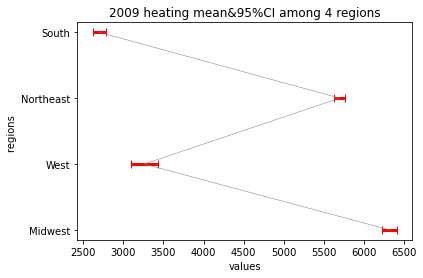

In [195]:
fig1, ax1 = plt.subplots()
ax1.errorbar(x = mean_09_heat, y = regions, xerr = [1.96 * i for i in se_09_heat], uplims = True, lolims = True,\
                   color = 'grey', ecolor = 'red', linewidth = '0.5', elinewidth = 3, capsize = 4)
_, _ = ax1.set_xlabel('values'), ax1.set_ylabel('regions ')
_ = ax1.set_title('2009 heating mean&95%CI among 4 regions')

# figure 2
&nbsp; Figure 2 describes heat average and 95% confidence interval of year 2015 among 4 regions named Midwest Census Region,
West Census Region, Northeast Census Region and South Census Region. X axis and Y axis of the figure represent values and regions.
Blue line and grey intervals mean value trend and point eatimate with 95% confidence interval. 

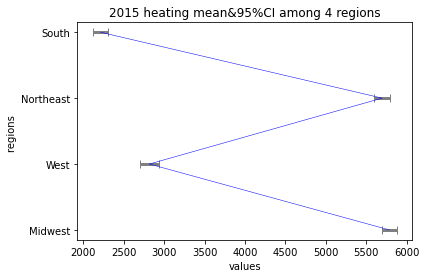

In [196]:
# figure 2 describes heat average and 95%CI of year 2015 among 4 regions.
fig2,ax2 = plt.subplots() 
ax2.errorbar(x = mean_15_heat, y = regions, xerr = [1.96 * i for i in se_15_heat], uplims = True, lolims = True,\
                   color = 'blue', ecolor = 'grey', elinewidth = 3, linewidth = 0.5, capsize = 4)
_, _ = ax2.set_xlabel('values'), ax2.set_ylabel('regions ')
_ = ax2.set_title('2015 heating mean&95%CI among 4 regions')

# figure 3
&nbsp; Figure 3 describes cool average and 95% confidence interval of year 2009 among 4 regions named Midwest Census Region,
West Census Region, Northeast Census Region and South Census Region. X axis and Y axis of the figure represent values and regions.
Pink line and purple intervals mean value trend and point eatimate with 95% confidence interval. 

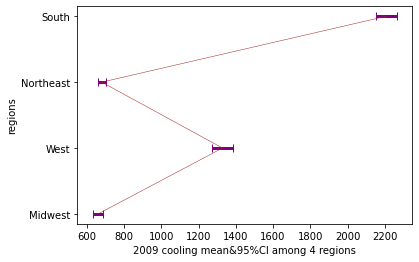

In [168]:
# figure 3 describes cool average and 95%CI of year 2009 among 4 regions.
fig3,ax3 = plt.subplots() 
ax3.errorbar(x = mean_09_cool, y = regions, xerr = [1.96 * i for i in se_09_cool], uplims = True, lolims = True,\
                   color = 'brown', ecolor = 'purple', elinewidth = 3, linewidth = 0.5, capsize = 4)
_, _ = ax3.set_xlabel('values'), ax2.set_ylabel('regions ')
_ = ax3.set_title('2009 cooling mean&95%CI among 4 regions')

# figure 4
&nbsp; Figure 4 describes cool average and 95% confidence interval of year 2015 among 4 regions named Midwest Census Region,
West Census Region, Northeast Census Region and South Census Region. X axis and Y axis of the figure represent values and regions.
Grey line and blue intervals mean value trend and point eatimate with 95% confidence interval. 

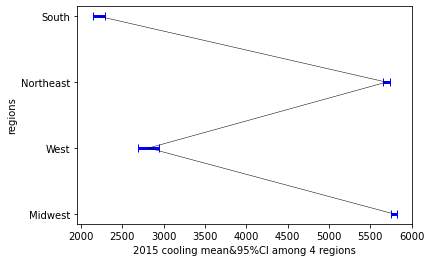

In [189]:
# figure 4 describes cool average and 95%CI of year 2015 among 4 regions.
fig4,ax4 = plt.subplots() 
ax4.errorbar(x = mean_15_cool, y = regions, xerr = [1.96 * i for i in se_15_cool], uplims = True, lolims = True,\
                   color = 'black', ecolor = 'blue', elinewidth = 3, linewidth = 0.5, capsize = 4)
_, _ = ax4.set_xlabel('values'), ax2.set_ylabel('regions ')
_ = ax4.set_title('2015 cooling mean&95%CI among 4 regions')

In [200]:
## figures for 2(b)
### standard error 2(b)
point_heat_diff = [mid_heat_diff, wes_heat_diff, nor_heat_diff, sou_heat_diff]
point_cool_diff = [mid_cool_diff, wes_cool_diff, nor_cool_diff, sou_cool_diff]
se_heat_diff = [var_mid_heat_diff, var_wes_heat_diff, var_nor_heat_diff, var_sou_heat_diff]
se_heat_diff = [np.sqrt(i) for i in se_heat_diff]
se_cool_diff = [var_mid_cool_diff, var_wes_cool_diff, var_nor_cool_diff, var_sou_cool_diff]
se_cool_diff = [np.sqrt(i) for i in se_cool_diff]

# figure 5
&nbsp; Figure 5 describes heating difference and 95% confidence interval among 4 regions named Midwest Census Region,
West Census Region, Northeast Census Region and South Census Region. X axis and Y axis of the figure represent values and regions.
Brown line and blue intervals mean value trend and point eatimate with 95% confidence interval. 

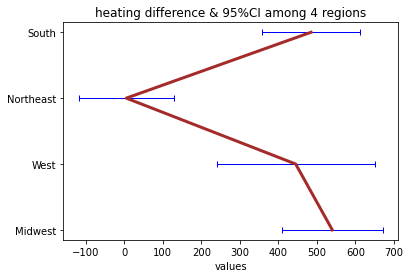

In [201]:
# figure 5 describes heat difference point estimate and 95%CI among 4 regions.
fig5,ax5 = plt.subplots() 
ax5.errorbar(x = point_heat_diff, y = regions, xerr = [1.96 * i for i in se_heat_diff], uplims = True, lolims = True,\
                   color = 'brown', ecolor = 'blue', elinewidth = 1, linewidth = 3, capsize = 3)
_, _ = ax5.set_xlabel('values'), ax2.set_ylabel('regions ')
_ = ax5.set_title('heating difference & 95%CI among 4 regions')

# figure 6
&nbsp; Figure 6 describes cooling difference and 95% confidence interval among 4 regions named Midwest Census Region,
West Census Region, Northeast Census Region and South Census Region. X axis and Y axis of the figure represent values and regions.
Pink line and black intervals mean value trend and point eatimate with 95% confidence interval. 

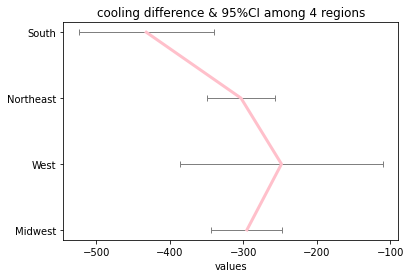

In [202]:
# figure 6 describes cool difference point estimate and 95%CIamong 4 regions.
fig6,ax6 = plt.subplots() 
ax6.errorbar(x = point_cool_diff, y = regions, xerr = [1.96 * i for i in se_cool_diff], uplims = True, lolims = True,\
                   color = 'pink', ecolor = 'grey', elinewidth = 1, linewidth = 3, capsize = 3)
_, _ = ax6.set_xlabel('values'), ax2.set_ylabel('regions ')
_ = ax6.set_title('cooling difference & 95%CI among 4 regions') 